# Funkcja f(x) = x * ln(x)^4

In [76]:
import sympy as sp

sp.init_printing()

In [77]:
x = sp.symbols('x')
definition = x * (sp.log(x) ** 4)

## Zadanie 1
Wyznacz dziedzinę funkcji i asymptoty, jeśli są.


In [78]:
domain = sp.calculus.util.continuous_domain(definition, x, sp.Reals)
asymptote_to_infinite = sp.limit(definition, x, sp.oo)
asymptote_to_negative_infinite = sp.limit(definition, x, -sp.oo)
asymptote_horizontal = sp.limit(definition, x, 0)

In [79]:
print(f'Dziedzina funkcji: {domain}')
print(f'Asymptota pionowa: {asymptote_to_infinite}')
print(f'Asymptota pozioma: {asymptote_horizontal}')

Dziedzina funkcji: Interval.open(0, oo)
Asymptota pionowa: oo
Asymptota pozioma: 0


## Zadanie 2
Narysuj wykres funkcji.

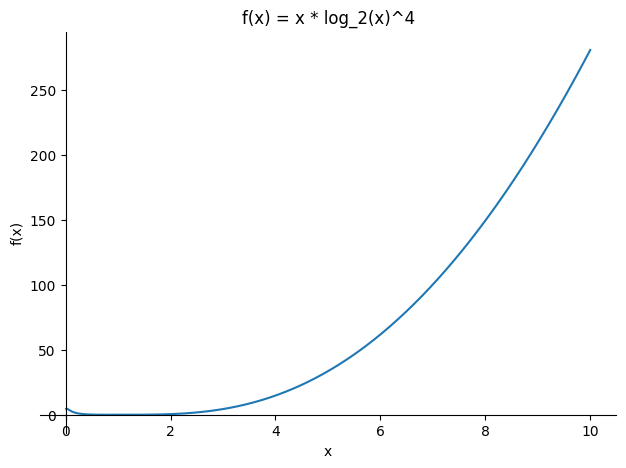

In [80]:
plot_title = 'f(x) = x * log_2(x)^4'
x_label = 'x'
y_label = 'f(x)'
step = 0.01
end_value = 10

sp.plot(definition, (x, step, end_value), title=plot_title, xlabel=x_label, ylabel=y_label)

## Zadanie 3
Obliczyć pochodne f(k), k = 1, 2, 3, 4 a następnie obliczyć wartości tych pochodnych w podanych punktach

In [81]:
first_derivative = sp.diff(definition)
second_derivative = sp.diff(first_derivative)
third_derivative = sp.diff(second_derivative)
fourth_derivative = sp.diff(third_derivative)

In [82]:
print(f'Pierwsza pochodna (1.11) {first_derivative.subs(x, 1.11).evalf()}')
print(f'Druga pochodna (2.22) {second_derivative.subs(x, 2.22).evalf()}')
print(f'Trzecie pochodna (3.33) {third_derivative.subs(x, 3.33).evalf()}')
print(f'Czwarta pochodna (4.44) {fourth_derivative.subs(x, 4.44).evalf()}')

Pierwsza pochodna (1.11) 0.00466495920995858
Druga pochodna (2.22) 4.35185927358923
Trzecie pochodna (3.33) 1.97565552576735
Czwarta pochodna (4.44) -0.545166487330982


## Zadanie 4
Wyznaczyć przedziały monotoniczności funkcji.

In [83]:
increasing_intervals = sp.solve(first_derivative > 0, x)
decreasing_intervals = sp.solve(first_derivative < 0, x)

print(f'Przedziały, na których funkcja jest rosnąca: {increasing_intervals}')
print(f'Przedziały, na których funkcja jest malejąca: {decreasing_intervals}')

Przedziały, na których funkcja jest rosnąca: (1 < x) | ((0 < x) & (x < exp(-4)))
Przedziały, na których funkcja jest malejąca: (x < 1) & (exp(-4) < x)


## Zadanie 5
Kiedy funkcja osiąga ekstrema?

In [84]:
derivative_zeroes = sp.solve(first_derivative, x)

min_value = definition.subs(x, derivative_zeroes[0]).evalf()
max_value = definition.subs(x, derivative_zeroes[0]).evalf()
min_for = derivative_zeroes[0]
max_for = derivative_zeroes[0]

for zero in derivative_zeroes:
    result = definition.subs(x, zero).evalf()
    if min_value > result:
        min_value = result
        min_for = zero

    if max_value < result:
        max_value = result
        max_for = zero

print(f'Maksimum dla {max_for}: {max_value}')
print(f'Minimum dla {min_for}: {min_value}')

Maksimum dla exp(-4): 4.68880355551595
Minimum dla 1: 0


## Zadanie 6
Wyznaczyć przedziały wypukłości i wklęsłości wykresu funkcji

In [85]:
potential_inflection_points = sp.solve(second_derivative, x)
potential_inflection_points = sorted(potential_inflection_points, key=lambda p: float(p.evalf()))
print("Punkty przegięcia:", potential_inflection_points)

intervals = [(0, potential_inflection_points[0]), (potential_inflection_points[0], potential_inflection_points[1]),
             (potential_inflection_points[1], float('inf'))]
print(f"Przedziały: {intervals}")


def get_test_point(interval):
    start, end = interval
    if end == float('inf'):
        return start + 1  # Dla nieskończoności punkt przesunięty o 1
    else:
        return (start + end) / 2


test_points = [get_test_point(interval) for interval in intervals]
print(f"Punkty testowe: {test_points} \n")

Punkty przegięcia: [exp(-3), 1]
Przedziały: [(0, exp(-3)), (exp(-3), 1), (1, inf)]
Punkty testowe: [exp(-3)/2, exp(-3)/2 + 1/2, 2] 



In [86]:
print("\nOdpowiedź:")
for i, interval in enumerate(intervals):
    value = second_derivative.subs(x, test_points[i]).evalf()
    if value > 0:
        print(f"Przedział {interval}: wypukła (f'' > 0)")
    elif value < 0:
        print(f"Przedział {interval}: wklęsła (f'' < 0)")
    else:
        print(f"Przedział {interval}: f'' = 0 (sprawdź dokładniej)")


Odpowiedź:
Przedział (0, exp(-3)): wklęsła (f'' < 0)
Przedział (exp(-3), 1): wypukła (f'' > 0)
Przedział (1, inf): wypukła (f'' > 0)


## Zadanie 7
Wykres funkcji f ma punkty przegięcia

Punkty przegięcia to miejsce w którym druga pochodna funkcji wynosi 0 lub jest niezdefiniowana, a dodatkowo następuje zmiana znaku.

In [87]:
for i, point in enumerate(test_points):
    value = second_derivative.subs(x, point).evalf()
    sign = '+' if value > 0 else '-' if value < 0 else '0'
    print(f"Przedział {intervals[i]}: f''({point}) = {value}, znak: {sign}")

Przedział (0, exp(-3)): f''(exp(-3)/2) = -1519.12015235506, znak: -
Przedział (exp(-3), 1): f''(exp(-3)/2 + 1/2) = 7.45739790882108, znak: +
Przedział (1, inf): f''(2) = 3.54876738748707, znak: +


In [88]:
print(f'Zmiana znaku następuje w {test_points[0]}, co oznacza, że występuje tu punkt przegięcia.')

Zmiana znaku następuje w exp(-3)/2, co oznacza, że występuje tu punkt przegięcia.


## Zadanie 8
Pole obszaru D ograniczonego wykresem funkcji y = f(x) i prostymi y = 0, x = 1, x = 7

f(x) > 0 dla x > 0

In [89]:
# Całka oznaczona od 1 do 7
definite_integral = sp.integrate(definition, (x, 1, 7))
print("Pole obszaru D:", definite_integral)

# Wartość numeryczna
pole_numeric = definite_integral.evalf()
print("Pole obszaru D (numerycznie):", pole_numeric)

Pole obszaru D: -49*log(7)**3 - 147*log(7)/2 + 36 + 147*log(7)**2/2 + 49*log(7)**4/2
Pole obszaru D (numerycznie): 161.523723002576


## Zadanie 9
Długość łuku L określanego wzorem L : y = f(x), x należącego do przedziału [1, 7] wynosi

In [93]:
integrand = sp.sqrt(1 + first_derivative ** 2) # wyrażenie pod pierwiastkiem
length = sp.integrate(integrand, (x, 1, 7)) # całka oznaczona
length_numeric = length.evalf()
print("Długość łuku L:", length_numeric)

Długość łuku L: 101.331959288273


## Zadanie 10
Objętość bryły Omegax powstałej w wyniku obrotu figury T : 0 <= y <= f(x), 1 <= x <= 7 wokół osi Ox wynosi